In [1]:
import numpy as np
import pandas as pd

 ### Question 1

 Import the data from `assets/fraud_data.csv`. What percentage of the
 observations in the dataset are instances of fraud?

 *This function should return a float between 0 and 1.*

In [2]:
def answer_one():
    df = pd.read_csv("assets/fraud_data.csv", usecols=["Class"])
    percentages = df["Class"].value_counts(normalize=True)
    return percentages.at[1]

In [3]:
answer_one()

0.016410823768035772

In [4]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

df = pd.read_csv("assets/fraud_data.csv")

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

 ### Question 2

 Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above),
 train a dummy classifier that classifies everything as the majority class
 of the training data. What is the accuracy of this classifier? What is
 the recall?

 *This function should a return a tuple with two floats, i.e. `(accuracy
 score, recall score)`.*

In [5]:
def answer_two():
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import recall_score

    clf = DummyClassifier(strategy="most_frequent")
    clf = clf.fit(X_train, y_train)

    accuracy = clf.score(X_test, y_test)

    y_pred = clf.predict(X_test)
    recall = recall_score(y_test, y_pred)

    return accuracy, recall

In [6]:
accuracy, recall = answer_two()
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")

Accuracy: 0.9852507374631269
Recall: 0.0


 ### Question 3

 Using `X_train`, `X_test`, `y_train`, `y_test` (as defined above), train
 a SVC classifer using the default parameters. What is the accuracy,
 recall, and precision of this classifier?

 *This function should a return a tuple with three floats, i.e. `(accuracy
 score, recall score, precision score)`.*

In [7]:
def answer_three():
    from sklearn.metrics import precision_score
    from sklearn.metrics import recall_score
    from sklearn.svm import SVC

    clf = SVC(random_state=0).fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    accuracy = clf.score(X_test, y_test)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    return accuracy, recall, precision

In [8]:
accuracy, recall, precision = answer_three()
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")

Accuracy: 0.9900442477876106
Recall: 0.35
Precision: 0.9333333333333333


 ### Question 4

 Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`,
 what is the confusion matrix when using a threshold of -220 on the
 decision function? Use `X_test` and `y_test`.

 *This function should return a confusion matrix, a 2x2 numpy array with 4
 integers.*

In [9]:
def answer_four():
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC

    clf = SVC(
        C=1e9,
        gamma=1e-07,  # pyright: ignore
        random_state=0,
    )
    clf = clf.fit(X_train, y_train)

    y_pred = (clf.decision_function(X_test) > -220).astype(int)
    confusion = confusion_matrix(y_test, y_pred)

    return confusion

In [10]:
answer_four()

array([[5320,   24],
       [  14,   66]])

 ### Question 5

 Train a logisitic regression classifier with default parameters using
 `X_train` and `y_train`.

 For the logistic regression classifier, create a precision-recall curve
 and a ROC curve using `y_test` and the probability estimates for `X_test`
 (probability it is fraud).

 Looking at the precision-recall curve, what is the recall when the
 precision is `0.75`?

 Looking at the ROC curve, what is the true positive rate when the false
 positive rate is `0.16`?

 *This function should return a tuple with two floats, i.e. `(recall, true
 positive rate)`.*

In [11]:
def answer_five():
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import precision_recall_curve
    from sklearn.metrics import roc_curve

    clf = LogisticRegression(solver="liblinear").fit(X_train, y_train)
    probs = clf.predict_proba(X_test)[:, 1]

    precisions, recalls, _ = precision_recall_curve(y_test, probs)
    recall = recalls[np.abs(precisions - 0.75).argmin()]

    fprs, tprs, _ = roc_curve(y_test, probs)
    tpr = tprs[np.argmax(fprs >= 0.16)]

    return recall, tpr

In [12]:
recall, tpr = answer_five()
print(f"Recall: {recall}")
print(f"TPR: {tpr}")

Recall: 0.825
TPR: 0.95


 ### Question 6

 Perform a grid search over the parameters listed below for a logisitic
 regression classifier, using recall for scoring and the default 5-fold
 cross validation. (Use `solver='liblinear'`)

 `'penalty': ['l1', 'l2']`

 `'C': [0.01, 0.1, 1, 10]`

 From `.cv_results_`, create an array of the mean test scores of each
 parameter combination. i.e.

 |            | `l1` | `l2` |
 |------------|------|------|
 | **`0.01`** | ?    | ?    |
 | **`0.1`**  | ?    | ?    |
 | **`1`**    | ?    | ?    |
 | **`10`**   | ?    | ?    |

 *This function should return a 4 by 2 numpy array with 8 floats.*

 *Note: do not return a DataFrame, just the values denoted by `?` in a
 numpy array.*

In [13]:
def answer_six():
    from sklearn.linear_model import LogisticRegression
    from sklearn.model_selection import GridSearchCV

    gs_lr = GridSearchCV(
        LogisticRegression(solver="liblinear"),
        param_grid={
            "penalty": ["l1", "l2"],
            "C": [0.01, 0.1, 1, 10],
        },
        scoring="recall",
    )
    gs_lr.fit(X_train, y_train)

    results = pd.DataFrame(data=gs_lr.cv_results_)
    results = results[
        ["param_C", "param_penalty", "mean_test_score"]
    ].sort_values(by="param_C")

    mts_l1 = results.loc[
        results["param_penalty"] == "l1", ["mean_test_score"]
    ].to_numpy()
    mts_l2 = results.loc[
        results["param_penalty"] == "l2", ["mean_test_score"]
    ].to_numpy()

    return np.hstack((mts_l1, mts_l2))

In [14]:
mts = answer_six()

print(mts)
print(mts.shape)

[[0.69558442 0.77168831]
 [0.80792208 0.81155844]
 [0.80428571 0.81149351]
 [0.80064935 0.80064935]]
(4, 2)


In [15]:
# Use the following function to help visualize results from the grid search
def GridSearch_Heatmap(scores):
    import matplotlib.pyplot as plt
    import seaborn as sns

    plt.figure()
    sns.heatmap(
        scores,
        xticklabels=["l1", "l2"],  # pyright: ignore
        yticklabels=[0.01, 0.1, 1, 10],  # pyright: ignore
        annot=True,
        fmt=".4f",
    )
    plt.yticks(rotation=0)

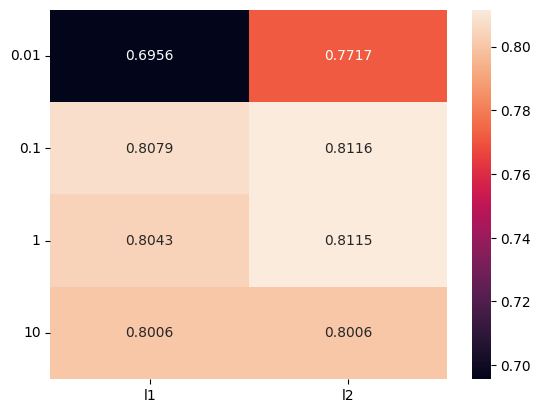

In [16]:
GridSearch_Heatmap(mts)